<a href="https://colab.research.google.com/github/MarcCampmanyGar/Nuclio_DS_Projects/blob/main/Series_Temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# generamos una lista de 110 años para nuestre serie temporal
años = np.arange(1821, 1931)
# la cantidad de pieles de linces captadas cada año
Pieles = [
269, 321, 585, 871, 1475, 2821, 3928, 5943, 4950, 2577,
523, 98, 184, 279, 409, 2285, 2685, 3409, 1824, 409,
151, 45, 68, 213, 546, 1033, 2129, 2536, 957, 361,
377, 225, 360, 731, 1638, 2725, 2871, 2119, 684, 299,
236, 245, 552, 1623, 3311, 6721, 4254, 687, 255, 473,
358, 784, 1594, 1676, 2251, 1426, 756, 299, 201, 229,
469, 736, 2042, 2811, 4431, 2511, 389, 73, 39, 49,
59, 188, 377, 1292, 4031, 3495, 587, 105, 387, 758,
1307, 3465, 6991, 6313, 3794, 1836, 345, 382, 808, 1388,
2713, 3800, 3091, 2985, 790, 674, 81, 80, 108, 229,
1132, 2432, 3574, 2935, 1537, 529, 485, 662, 1000, 1590
]

In [ ]:
data = {
    "años":años,
    "pieles":Pieles
}

In [ ]:
años[:10]

array([1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830])

In [ ]:
Pieles[:10]

[269, 321, 585, 871, 1475, 2821, 3928, 5943, 4950, 2577]

In [ ]:
df = pd.DataFrame([años, Pieles]).T
df.columns = ['Años', 'pieles']
df.head()

,Años,pieles
0,1821,269
1,1822,321
2,1823,585
3,1824,871
4,1825,1475


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Años    110 non-null    int64
 1   pieles  110 non-null    int64
dtypes: int64(2)
memory usage: 1.8 KB


In [ ]:
df['Años'] = pd.to_datetime(df['Años'], format='%Y')

In [ ]:
df.head()

,Años,pieles
0,1821-01-01,269
1,1822-01-01,321
2,1823-01-01,585
3,1824-01-01,871
4,1825-01-01,1475


In [ ]:
df.set_index('Años', inplace=True)

In [ ]:
df.head()

,pieles
Años,
1821-01-01,269
1822-01-01,321
1823-01-01,585
1824-01-01,871
1825-01-01,1475


In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# AR = autoregresivo --> utilizando con el pasado. Que puedo predecir los valores a partir de los valores pasados
# MA = medias móviles --> utilizando los errores. Oscilar entorno a una media


# lo mejor de los dos mundos
# ARMA(pq) = AUTOREGRESIVE MOVING AVERAGE
  # p = cuantos lags puedo utilizar de la parte AR
  # q = errores de MA


In [ ]:
# en timeseries, cuando hablo de valores del pasado = los valores se llaman shift o lag

df['pieles_y1'] = df['pieles'].shift(1)
df['pieles_y2'] = df['pieles'].shift(2)
df['pieles_y3'] = df['pieles'].shift(3)

df['global_mean'] = df['pieles'].mean()
df['error_1'] = df['pieles_y1'] - df['global_mean']
df['error_2'] = df['pieles_y2'] - df['global_mean']
df['error_3'] = df['pieles_y3'] - df['global_mean']

df['diff'] = df['pieles'].diff()

df['pieles_log'] = df['pieles'].apply(np.log)
df['diff_log'] = df['pieles_log'].diff()
 
df.head()

,pieles,pieles_y1,pieles_y2,pieles_y3,global_mean,error_1,error_2,error_3,diff,pieles_log,diff_log
Años,,,,,,,,,,,
1821-01-01,269,NaN,NaN,NaN,1506.627273,NaN,NaN,NaN,NaN,5.594711,NaN
1822-01-01,321,269.0,NaN,NaN,1506.627273,-1237.627273,NaN,NaN,52.0,5.771441,0.176730
1823-01-01,585,321.0,269.0,NaN,1506.627273,-1185.627273,-1237.627273,NaN,264.0,6.371612,0.600171
1824-01-01,871,585.0,321.0,269.0,1506.627273,-921.627273,-1185.627273,-1237.627273,286.0,6.769642,0.398030
1825-01-01,1475,871.0,585.0,321.0,1506.627273,-635.627273,-921.627273,-1185.627273,604.0,7.296413,0.526771


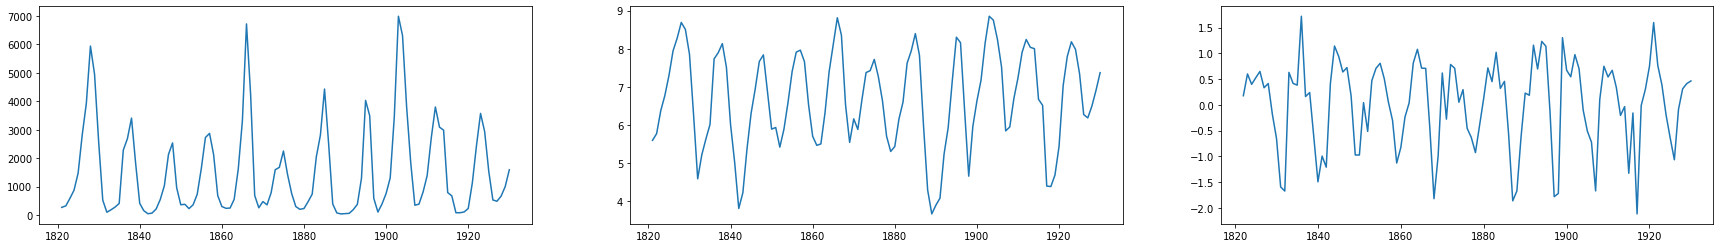

In [ ]:
fig = plt.figure(figsize = (30,4))
ax1, ax2, ax3 = fig.subplots(1,3) #axis

x=df.index
y=df['pieles']
y_log = df['pieles_log']
y_log_diff = df['diff_log']

ax1.plot(x,y)
ax2.plot(x,y_log)
ax3.plot(x, y_log_diff)

In [ ]:
np.mean(y_log_diff)

# muy cercano a 0

0.016300714822132464

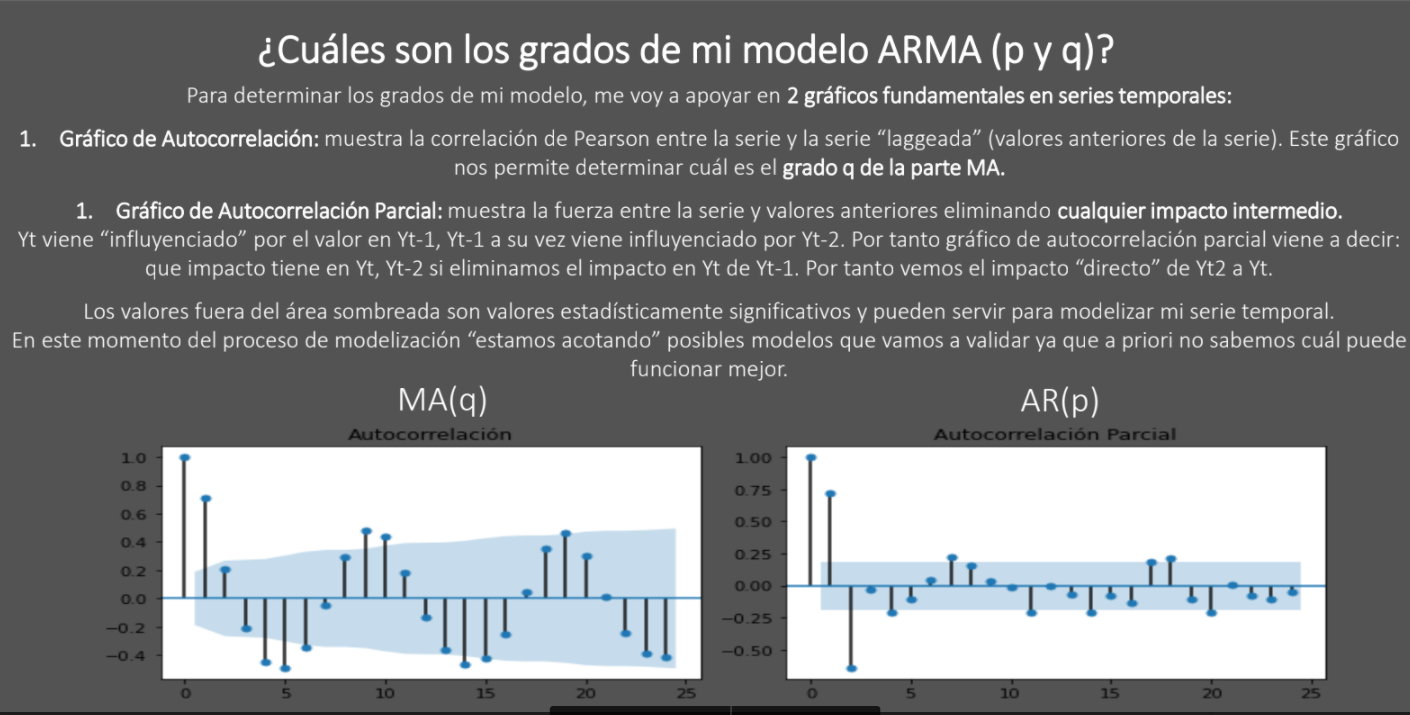

In [ ]:
# autoregresivo= los valores estan relacionados con el valor anterior, por tanto un valor estará autocorrelacionado con el anterior (el cual lo está con su anterior)
# en la autocorrelación parcial, nos cargamos el mediano para ver la relacion entre x y x_2

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   #autocorrelation y partial autocorrelation

In [ ]:
df[['pieles', 'pieles_log', 'diff_log']].head()

,pieles,pieles_log,diff_log
Años,,,
1821-01-01,269,5.594711,NaN
1822-01-01,321,5.771441,0.176730
1823-01-01,585,6.371612,0.600171
1824-01-01,871,6.769642,0.398030
1825-01-01,1475,7.296413,0.526771


In [ ]:
df.dropna(inplace= True, axis=0)

# Gráficos autoregresión

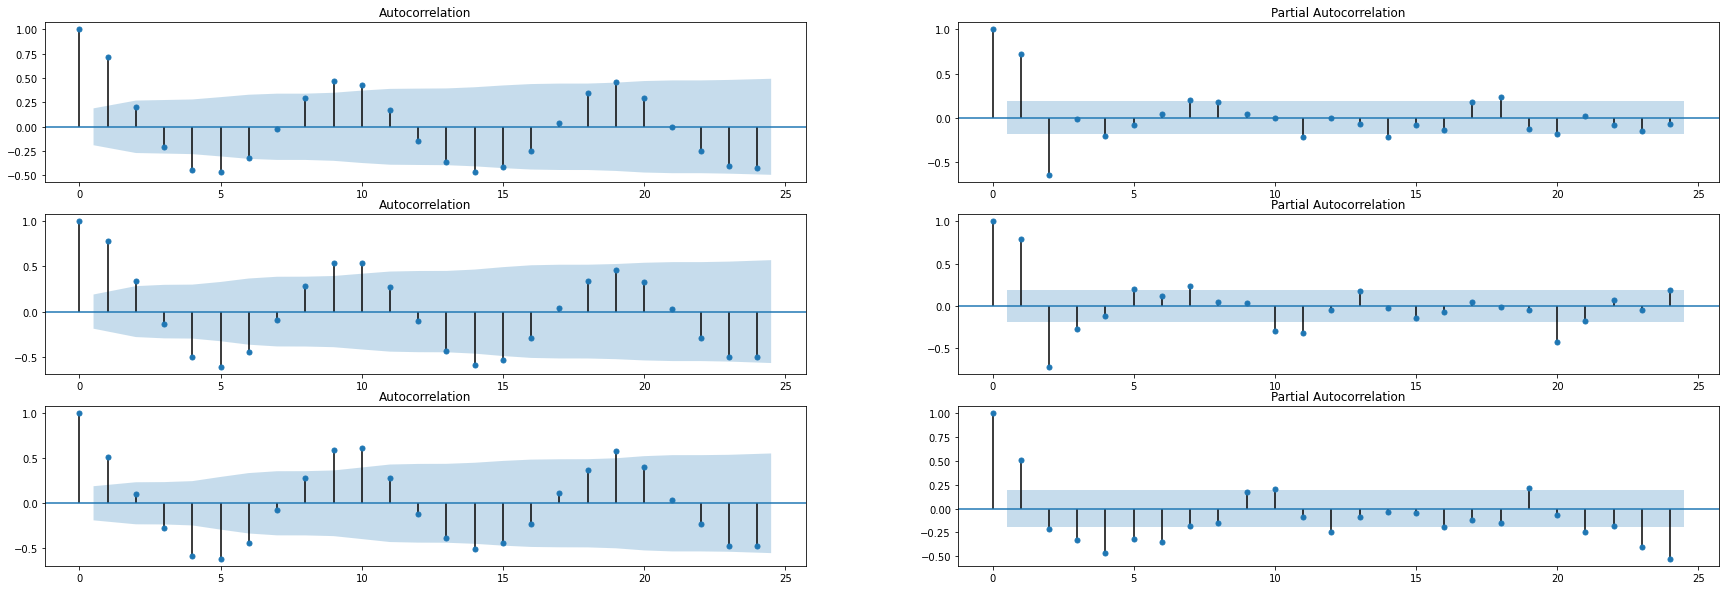

In [ ]:
fig = plt.figure(figsize = (30,10))
(ax1, ax2), (ax3, ax4), (ax5, ax6) = fig.subplots(3, 2)

plot_acf(x= df['pieles'], lags=24 , ax=ax1)
plot_pacf(x=df['pieles'], lags=24, ax=ax2);

plot_acf(x= df['pieles_log'], lags=24 , ax=ax3)
plot_pacf(x=df['pieles_log'], lags=24, ax=ax4);

plot_acf(x= df['diff_log'], lags=24 , ax=ax5)
plot_pacf(x=df['diff_log'], lags=24, ax=ax6);

# Modelo

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df["años"] = pd.to_datetime(df["años"], format = "%Y")
df.set_index("años", inplace = True)
df["pieles_log"] = df["pieles"].apply(np.log)

In [ ]:
series_a_predecir = df['pieles_log']

In [ ]:
series_a_predecir.head()

años
1821-01-01    5.594711
1822-01-01    5.771441
1823-01-01    6.371612
1824-01-01    6.769642
1825-01-01    7.296413
Name: pieles_log, dtype: float64

In [ ]:
from pandas.core import series
int(len(series_a_predecir.index))

110

In [ ]:
train_idx = int(len(series_a_predecir.index) * 0.9)
train_idx

99

In [ ]:
train = series_a_predecir.iloc[:train_idx]

In [ ]:
train.tail()

años
1915-01-01    6.672033
1916-01-01    6.513230
1917-01-01    4.394449
1918-01-01    4.382027
1919-01-01    4.682131
Name: pieles_log, dtype: float64

In [ ]:
val = series_a_predecir.iloc[train_idx:]

In [ ]:
val.head()

años
1920-01-01    5.433722
1921-01-01    7.031741
1922-01-01    7.796469
1923-01-01    8.181441
1924-01-01    7.984463
Name: pieles_log, dtype: float64

In [ ]:
# ARIMA(pdq)
# p = 2  --> AR con 2 lags
# d = 1  --> integrated 1 diferenciación pd.diff()
# q = 1  --> MA con 1 errores


## Grid Search

In [ ]:
order_model = ()    #orden de mi modelo

In [ ]:
import itertools

In [ ]:
p=d=q=np.arange(0, 4)

In [ ]:
p

array([0, 1, 2, 3])

In [ ]:
d

array([0, 1, 2, 3])

In [ ]:
q

array([0, 1, 2, 3])

In [ ]:
list(itertools.product([1,2], [2,3]))
# te devuelve todas las posibilidades que le das, 1 con 2, 1 con 3, 2 con 2 y 2 con 3

[(1, 2), (1, 3), (2, 2), (2, 3)]

In [ ]:
order_params = list(itertools.product(p,d,q))   #te devuelve todas las combinaciones posibles para nuestro grid search

In [ ]:
seasonal_order_model = (0,0,0,0)
#para forzar que estamos en el "mundo" del ARiMA, sin la s de seasonal

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for params in order_params:

  model = sm.tsa.statespace.SARIMAX(
      train,
      order = params,
      seasonal_order = seasonal_order_model,
      enforce_stationarity= False,
      enforce_invertibility= False
  )

  results = model.fit()
  aic_coef = results.aic

  print(f"Working with {params} params, aic score is {aic_coef}")

Working with (0, 0, 0) params, aic score is 654.9830238516744
Working with (0, 0, 1) params, aic score is 523.1510749111841
Working with (0, 0, 2) params, aic score is 432.8165677263744
Working with (0, 0, 3) params, aic score is 358.93391649503013
Working with (0, 1, 0) params, aic score is 247.45171380913993
Working with (0, 1, 1) params, aic score is 221.37811106866928
Working with (0, 1, 2) params, aic score is 218.67140192311115
Working with (0, 1, 3) params, aic score is 217.20996957439988
Working with (0, 2, 0) params, aic score is 246.36721456464545
Working with (0, 2, 1) params, aic score is 245.5202326957044
Working with (0, 2, 2) params, aic score is 224.4862078526589
Working with (0, 2, 3) params, aic score is 221.48433854533374
Working with (0, 3, 0) params, aic score is 320.1936098581443
Working with (0, 3, 1) params, aic score is 248.70937576911103
Working with (0, 3, 2) params, aic score is 247.7076848347428
Working with (0, 3, 3) params, aic score is 230.5938670972012


## Modelo 3,1,3

In [ ]:
best_params = (3,1,3)

In [ ]:
model = sm.tsa.statespace.SARIMAX(
    train,
    order = best_params,
    seasonal_order = (0,0,0,0),
    enforce_stationarity= False,
    enforce_invertibility= False
)

# La X hace referencia a que se pueden añadir variables exógenas (como p.e. para indicar que un dia es festivo, etc.)
# La S hace referencia a seasonal

In [ ]:
results = model.fit()

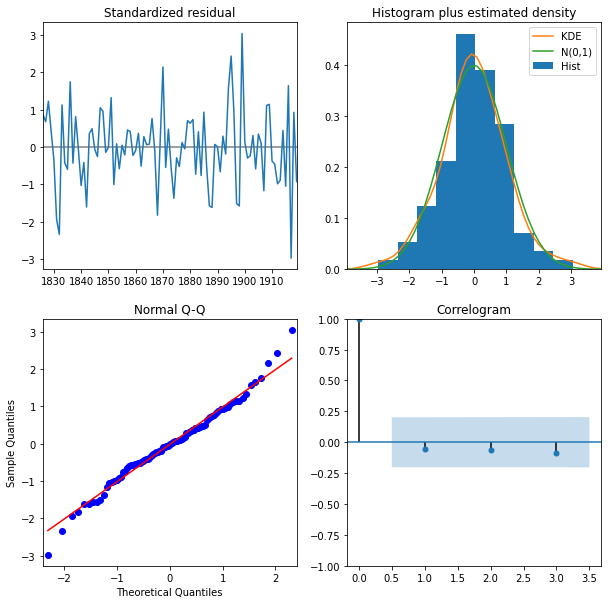

In [ ]:
results.plot_diagnostics(figsize = (10, 10), lags =3);

In [ ]:
# el primer gráfico muestra los errores, la media tiene que ser 0 e impredecible ya que represneta ruido blanco, debe ser aleatorio
# el segundo comparamos la distribución de nuestros residuos/errores con la distribución de una normal. La verde es la normal.
# el 3o es la misma distribución para ver los quartiles teoricos
# el 4o es el correlogram. Buscamos si en algun momento el error está relacionado con algún error del pasado (el residuo del modelo).
      # Mira si hay correlación de los errores. Si hubiera algo de correlación aún en el gráfico, significa que no hemos sacado toda la xixa.

In [ ]:
# Para hacer una predicción es suficiente con especificar el número de steps/pasos futuros a estimar.

pred_uc = results.get_forecast(steps = len(val))

# Calcula el intervalo de confianza de la predicción.
pred_ci = pred_uc.conf_int()

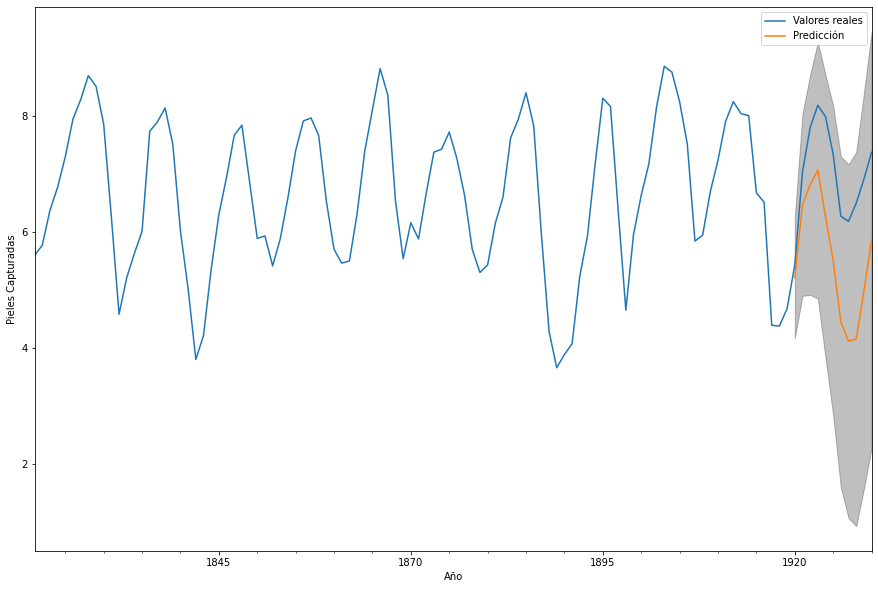

In [ ]:
ax = series_a_predecir.plot(label = 'Valores reales', figsize = (15, 10))

pred_uc.predicted_mean.plot(ax = ax, label = 'Predicción')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Año')
ax.set_ylabel('Pieles Capturadas')

plt.legend()
plt.show()

In [ ]:
# si vemos el notebook de Nico, con un modelo más sencillo ajusta mejor la predicción!!!

## un modelo más sencillo 2,1,2

In [ ]:
best_params = (2,1,2)

In [ ]:
model = sm.tsa.statespace.SARIMAX(
    train,
    order = best_params,
    seasonal_order = (0,0,0,0),
    enforce_stationarity= False,
    enforce_invertibility= False
)

# La X hace referencia a que se pueden añadir variables exógenas (como p.e. para indicar que un dia es festivo, etc.)
# La S hace referencia a seasonal

In [ ]:
results = model.fit()

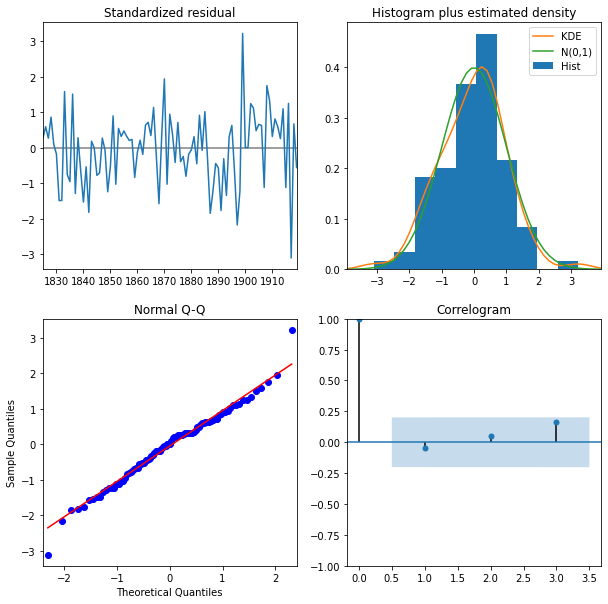

In [ ]:
results.plot_diagnostics(figsize = (10, 10), lags =3);

In [ ]:
# Para hacer una predicción es suficiente con especificar el número de steps/pasos futuros a estimar.

pred_uc = results.get_forecast(steps = len(val))

# Calcula el intervalo de confianza de la predicción.
pred_ci = pred_uc.conf_int()

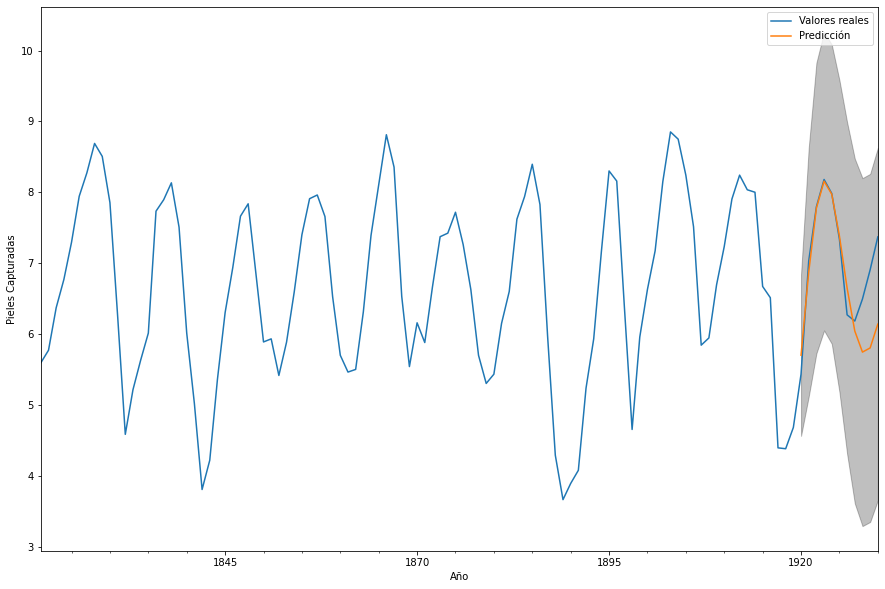

In [ ]:
ax = series_a_predecir.plot(label = 'Valores reales', figsize = (15, 10))

pred_uc.predicted_mean.plot(ax = ax, label = 'Predicción')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Año')
ax.set_ylabel('Pieles Capturadas')

plt.legend()
plt.show()